### Student Information
Name:Lu-Ying Huang 黃律瑛

Student ID:114062530

GitHub ID:lu1hOAO

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Load the data and check basic information

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

In [2]:
df.shape

(847, 16)

In [3]:
df.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [5]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
print(df["sentiment"].nunique())
print(df["label"].nunique())

3
3


In [7]:
for i,text in enumerate(df["text"].head(3)):
    print(f"example{i+1}==============")
    print(text)
    print()

example1==============
Calls on retards

example2==============
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example3==============
Seeing lots of red in the ticker.



In this step, I observe that:
1. The dataset is small, so I decided not to do sampling.
2. The dataset’s sentiment and label seem to describe the meaning of the text — the sentiment is machine-generated, while the label is human-annotated. I will focus on the relationship between the text, sentiment, and label in later processing.

### Handle Missing Data 

In [8]:
df=df[df["upvotes"]>=0]
df.shape

(826, 16)

In [9]:
df=df.drop(columns=["downvotes","upvote_ratio"])

In [10]:
df.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities',
       'label'],
      dtype='object')

### Handle Duplicated Data

In [11]:
sum(df.duplicated("text"))

23

In [12]:
df.drop_duplicates(subset=["text"],keep=False,inplace=True)

In [13]:
sum(df.duplicated("text"))

0

### Feature Subset Selection

In [14]:
df=df.drop(columns=["post_id","url","author"])

In [15]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [16]:
df.head()

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.00000,-0.900000,-1.0,[],-1.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.00000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,He didn’t say thank you.,0.00000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.50000,0.250000,1.0,"['tonight', 'puss']",0.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
print(df.sentiment.value_counts())
print(df.label.value_counts())

sentiment
 1.0    305
 0.0    296
-1.0    191
Name: count, dtype: int64
label
 0.0    380
-1.0    309
 1.0    103
Name: count, dtype: int64


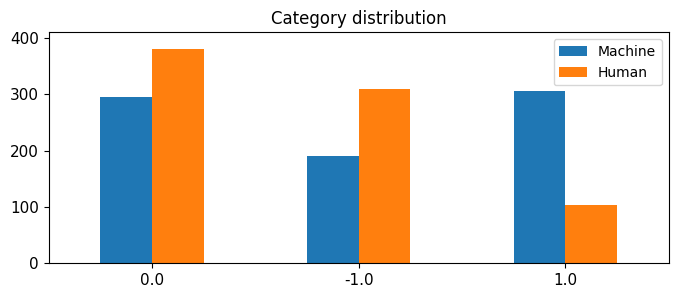

In [19]:
Merge =pd.DataFrame({
    "Machine":df.sentiment.value_counts(),
    "Human":df.label.value_counts()
})

Merge = Merge.sort_values(by="Human", ascending=False)
Merge.plot(kind='bar',
           title='Category distribution',
           ylim=[0, Merge.values.max() + 30],
           rot=0, fontsize=11, figsize=(8,3),
           color=['tab:blue', 'tab:orange'])

plt.legend(loc='upper right')
plt.show()   

In this step, I clean the unreasonable data and remove columns with too many missing values. 
Since I already decided to focus on the relationship between text, sentiment, and label, I also drop the columns I consider irrelevant.

### Feature Creation

In [20]:
df["datetime"]=pd.to_datetime(df['datetime'])
df=df.sort_values(by="datetime")

In [21]:
df=df.reset_index(drop=True)
df.head()

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2021-01-28 17:58:52,stockstobuytoday,r/stockstobuytoday Lounge,1,DOGE is going up today 153%,0.000,0.000,0.0,"['today', '%', 'DOGE']",1.0
1,comment,2021-01-28 17:59:46,stockstobuytoday,r/stockstobuytoday Lounge,1,I feel like that’s gonna tank soon though,0.000,0.000,0.0,"['tank', '’']",-1.0
2,comment,2021-01-31 02:02:38,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",1,awesome,1.000,1.000,1.0,['awesome'],1.0
3,comment,2021-02-01 08:17:04,stockstobuytoday,r/stockstobuytoday Lounge,1,lets see how they perform pre-market,0.000,0.000,0.0,['pre-market'],0.0
4,comment,2021-02-01 13:56:01,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,I was also disappointed to see it mentioned in...,0.675,-0.125,-1.0,"['Morning', 'Brew', 'newsletter']",-1.0


In [388]:
import nltk
import helpers.data_mining_helpers as dmh
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [389]:
count_vect=CountVectorizer(analyzer="word",stop_words="english")
count_vect.fit_transform(df["text"])

<792x4083 sparse matrix of type '<class 'numpy.int64'>'
	with 9413 stored elements in Compressed Sparse Row format>

In [390]:
df["unigrams"]=df["text"].apply(lambda text:count_vect.build_analyzer()(text))

In [391]:
df[0:4]["unigrams"]

0                 [doge, going, today, 153]
1    [feel, like, thatâ, gonna, tank, soon]
2                                 [awesome]
3              [lets, perform, pre, market]
Name: unigrams, dtype: object

In [392]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label',
       'unigrams'],
      dtype='object')

In [393]:
df_counts=count_vect.fit_transform(df.text)
print(df_counts.shape)

(792, 4083)


In [394]:
print(df_counts[0])
print()
print(df_counts[1])

  (np.int32(0), np.int32(1156))	1
  (np.int32(0), np.int32(1637))	1
  (np.int32(0), np.int32(3678))	1
  (np.int32(0), np.int32(32))	1

  (np.int32(0), np.int32(1447))	1
  (np.int32(0), np.int32(2177))	1
  (np.int32(0), np.int32(3626))	1
  (np.int32(0), np.int32(1641))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(3351))	1


In [395]:
print(count_vect.get_feature_names_out()[1139])
print(count_vect.get_feature_names_out()[1613])
print(count_vect.get_feature_names_out()[3627])   
print(count_vect.get_feature_names_out()[31])  
print(df[0:1]["text"])

distributor
giant
theories
150
0    DOGE is going up today 153%
Name: text, dtype: object


In [396]:
count_vect.get_feature_names_out()[0:10] 

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [397]:
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [398]:
plot_y=["text_"+str(i) for i in list(df.index)[0:20]]

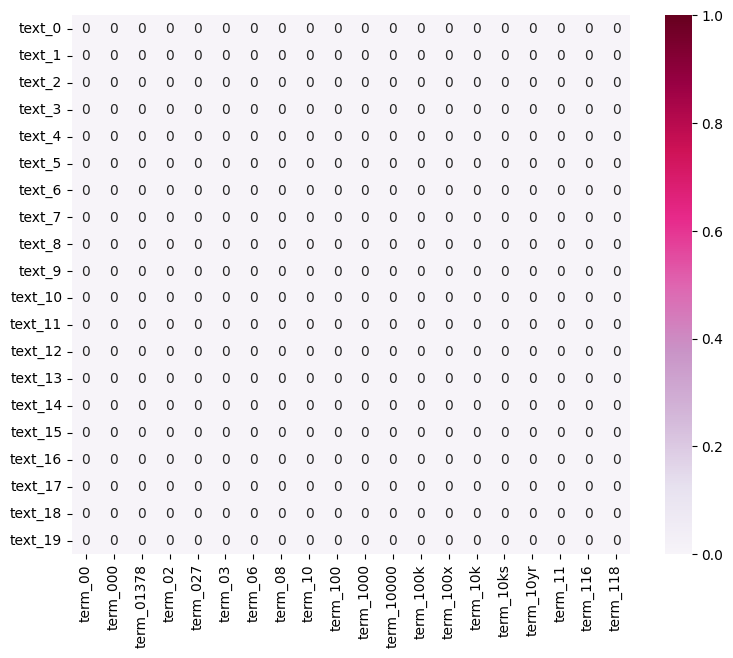

In [399]:
plot_z = df_counts[0:20, 0:20].toarray() 
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
head_map= sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [400]:
first20=df_counts[:20,:]
mask=(first20.sum(axis=0)>0).A1

first20_nz=first20[:,mask].toarray()

In [401]:
plot_x=np.array(count_vect.get_feature_names_out())[mask][0:20]
plot_y=["text_"+ str(i) for i in list(df.index)[0:20]]

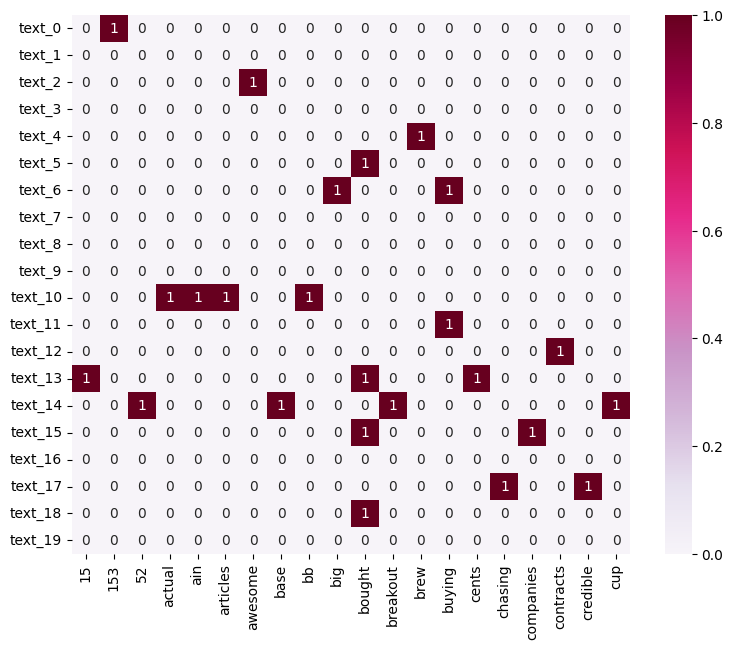

In [402]:
df_todraw=pd.DataFrame(first20_nz[:20,:20], columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
first20_nz_heat_map = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [403]:
import plotly.express as px
term_frequencies=np.asarray(df_counts.sum(axis=0))[0]

In [404]:
draw_to=pd.DataFrame({"terms":count_vect.get_feature_names_out()[:300],
                "frequence":term_frequencies[:300]})
g=px.bar(draw_to,x="terms",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

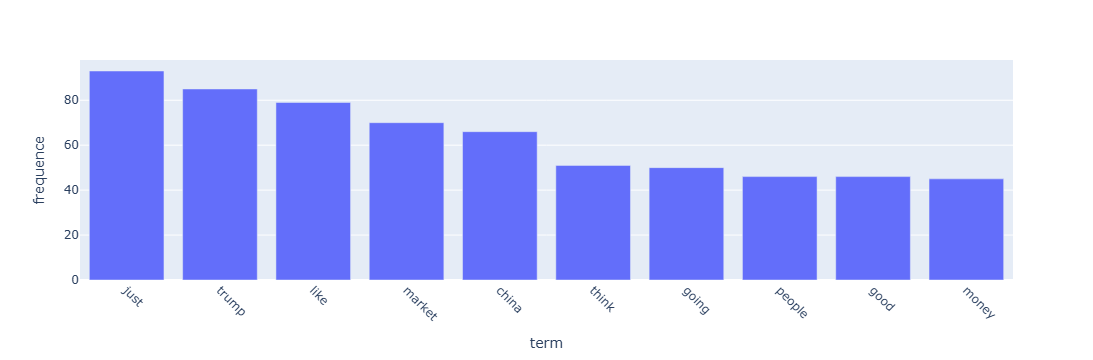

In [405]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_idx=np.argsort(-term_frequencies )[:10]

draw_to=pd.DataFrame({"term":count_vect.get_feature_names_out()[top_idx],
                  "frequence":term_frequencies[top_idx]})
g=px.bar(draw_to,x="term",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

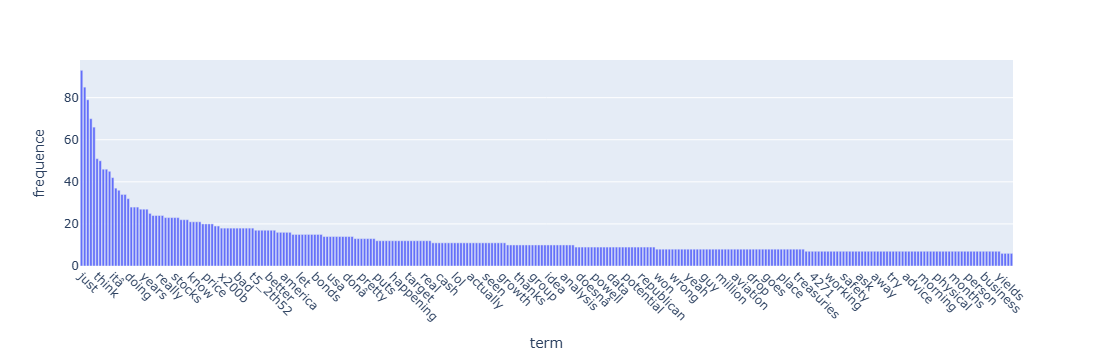

In [406]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_idx=np.argsort(-term_frequencies )[:300]

draw_to=pd.DataFrame({"term":count_vect.get_feature_names_out()[top_idx],
                  "frequence":term_frequencies[top_idx]})
g=px.bar(draw_to,x="term",y="frequence")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

C:\Users\ring9\AppData\Local\Temp\ipykernel_13880\2560774964.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



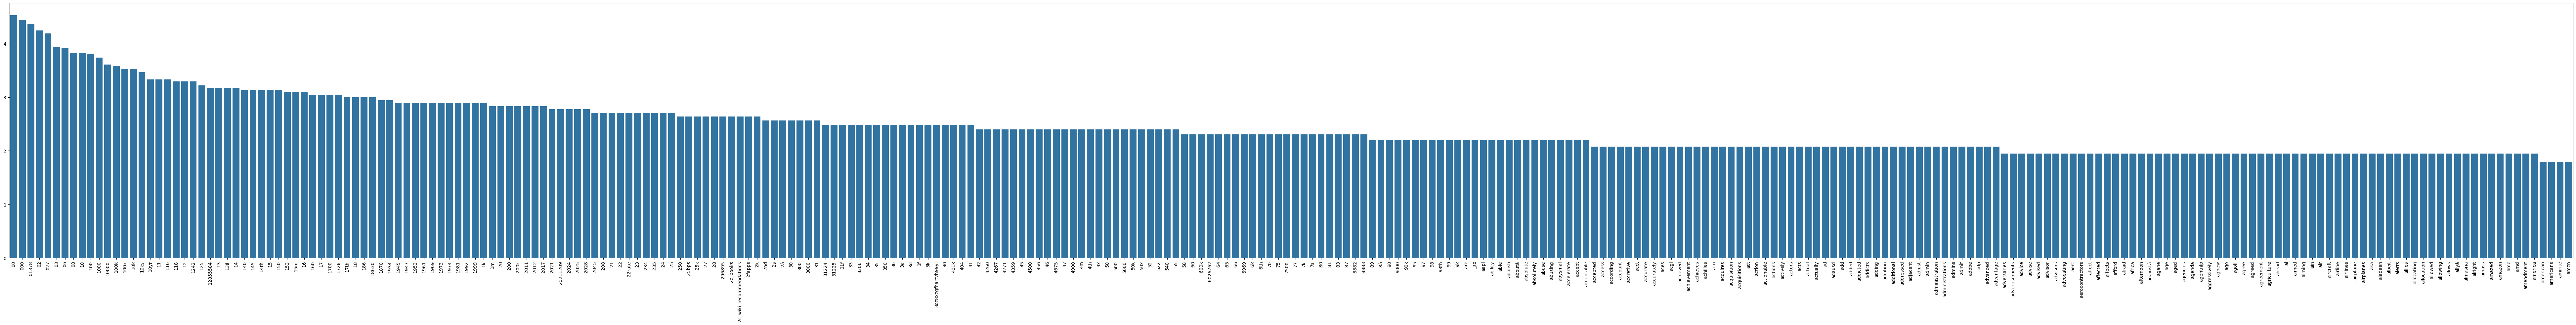

In [407]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies[top_idx]]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

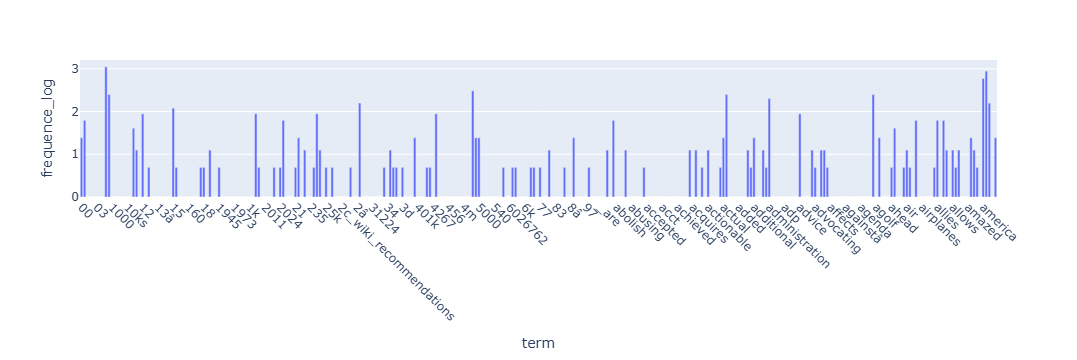

In [408]:
term_frequencies_log = [math.log(i) for i in term_frequencies]


draw_to=pd.DataFrame({"term":count_vect.get_feature_names_out()[0:300],
                  "frequence_log":term_frequencies_log[0:300]})
g=px.bar(draw_to,x="term",y="frequence_log")
g.update_traces(textposition="outside")
g.update_layout(xaxis_tickangle=45)
g.show()

In this step, I first sort the data by time, since people’s reactions to the stock market are more similar within the same period.
Next, I tokenize the text into unigrams and set English stop words to keep more meaningful terms. 
Finally, I visualize the results.

# Phase 2

### Finding Frequent Patterns -pre-processing

In [22]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [23]:
df['text'].head()

0                          DOGE is going up today 153%
1            I feel like that’s gonna tank soon though
2                                              awesome
3                 lets see how they perform pre-market
4    I was also disappointed to see it mentioned in...
Name: text, dtype: object

In [24]:
import re
def remove_digits(text):
    text = text.lower()
    return re.sub(r'[^a-z\s]+', '', text)

In [25]:
df['text']=df['text'].apply(remove_digits)
df['text'].head()

0                              doge is going up today 
1             i feel like thats gonna tank soon though
2                                              awesome
3                  lets see how they perform premarket
4    i was also disappointed to see it mentioned in...
Name: text, dtype: object

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sentiments = df['sentiment'].unique()  # Get unique category labels
sentiments_dfs = {}  # Dictionary to store DataFrames for each category

for sentiment in sentiments:
    sentiments_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

In [29]:
sentiments_dfs[0]['text'].head()

0                               doge is going up today 
1              i feel like thats gonna tank soon though
3                   lets see how they perform premarket
10    etrade has a feed of news articles about how r...
12    the squeeze for silver is different if people ...
Name: text, dtype: object

In [30]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ring9\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
def create_term_document_df(df):
    count_vect = CountVectorizer(preprocessor=lemmatize_text) 
    df_counts = count_vect.fit_transform(df['text'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    return term_document_df

In [32]:
filt_term_document_dfs={}
for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiments_dfs[sentiment])

In [33]:
filt_term_document_dfs[0]

,aapl,about,above,accelerate,access,achilles,acquisition,act,actualreddit,adausd,...,yet,yield,yo,you,youd,your,youre,youve,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


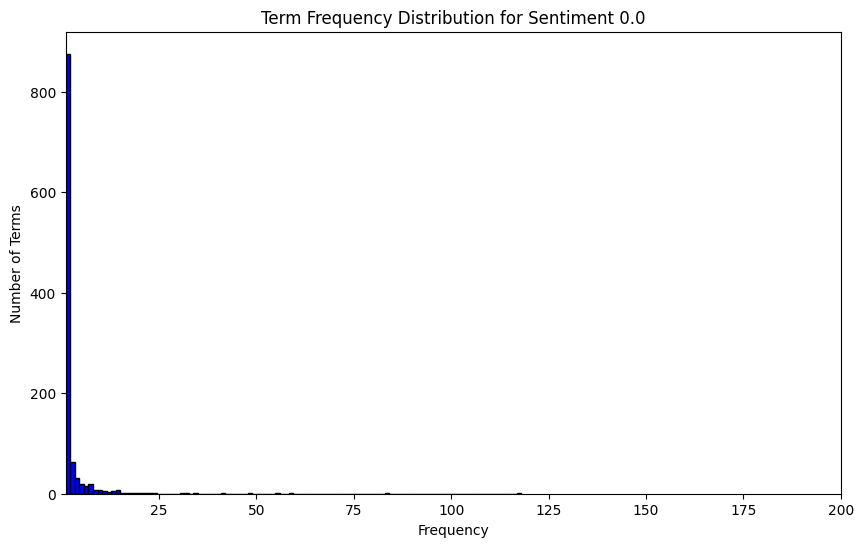

In [34]:
sentiment_number=0 
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

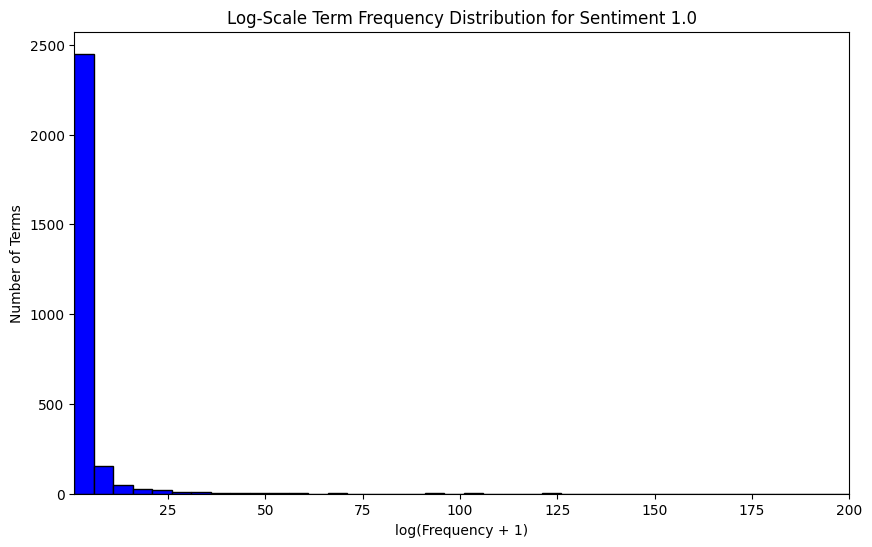

In [35]:
import numpy as np
sentiment_number=1 
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
word_counts_log = np.log1p(word_counts) # plus 1 to avoid log0

# Visualize the log(frequency+1) distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Log-Scale Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('log(Frequency + 1)')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

### Finding Frequent Patterns -delete some words

In [47]:
word_counts

array([ 2, 11,  1, ...,  1,  1,  1])

In [48]:
sentiment_number=0 
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: 0.0
Number of terms in top 5%: 54
Filtered terms: ['the', 'to', 'is', 'it', 'and', 'of', 'in', 'for', 'you', 'that', 'on', 'this', 'are', 'he', 'just', 'they', 'what', 'will', 'if', 'not', 'up', 'market', 'at', 'my', 'be', 'or', 'trump', 'have', 'want', 'can', 'so', 'stock', 'get', 'all', 'no', 'wa', 'them', 'about', 'from', 'go', 'with', 'how', 'call', 'xb', 'going', 'ha', 'do', 'like', 'we', 'over', 'one', 'any', 'after', 'your']


In [49]:
sorted_indices

array([924, 947, 533, ...,  24,  23,  21])

In [50]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'the'].sum(axis=0)

np.int64(118)

In [51]:
sentiment_number=0
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: 0.0
Number of terms in bottom 1%: 10
Filtered terms: ['againstdont', 'agolf', 'agreement', 'agriculture', 'ai', 'aint', 'airline', 'aladeen', 'passant', 'passed']


In [52]:
sorted_indices

array([ 21,  23,  24, ..., 533, 947, 924])

In [53]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'ai'].sum(axis=0) 

np.int64(1)

In [54]:
sentiment_number=0 

# Filter the top 5% words based on their sum across all documents
def filter_top_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    
    words_to_remove = sorted_words.tail(top_n).index
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    
    return term_document_df.drop(columns=words_to_remove)

In [55]:
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_words_by_sum(filt_term_document_dfs[sentiment])


For sentiment 0.0 we filter the following words:
Top 5.0% words: 
your        9
after       9
any         9
one         9
over        9
we         10
like       10
do         10
ha         10
going      10
xb         10
call       10
how        11
with       11
go         11
from       11
about      11
them       11
wa         12
no         12
all        12
get        12
stock      13
so         13
can        13
want       13
have       13
trump      13
or         14
be         14
my         14
at         14
market     15
up         15
not        15
if         16
will       17
what       18
they       18
just       19
he         20
are        22
this       23
on         23
that       24
you        31
for        32
in         34
of         41
and        48
it         55
is         59
to         83
the       118
dtype: int64

For sentiment 1.0 we filter the following words:
Top 5.0% words: 
put           12
president     12
sure          12
youre         12
term          13
            

In [56]:
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment 0.0:


,aapl,above,accelerate,access,achilles,acquisition,act,actualreddit,adausd,add,...,yes,yesterday,yet,yield,yo,youd,youre,youve,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Finding Frequent Patterns -search patterns

In [57]:
from PAMI.extras.convert.DF2DB import DF2DB            

sentiment_labels={
    1.0:"positive",
    -1.0:"negative",
    0.0: "neutral"
}

for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment_labels[sentiment]
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)


In [58]:
df_positive_check =pd.read_csv('td_freq_db_positive.csv',header=None)
print(df_positive_check.head())

                                                   0
0                                            awesome
1  excited\tfund\thappen\thedge\tlmao\tlot\tnonse...
2  am\tbase\tbreakout\tcup\tfolk\tfollow\tgreen\t...
3        amount\tbought\tmade\tmorning\tnice\tsilver
4  credible\tdoge\teaten\theadlinechasing\tinvest...


In [59]:
import builtins
_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 303
Number of items : 2625
Minimum Transaction Size : 1
Average Transaction Size : 15.970297029702971
Maximum Transaction Size : 185
Standard Deviation Transaction Size : 21.498847361325414
Variance in Transaction Sizes : 463.73090289161365
Sparsity : 0.9939160773220179


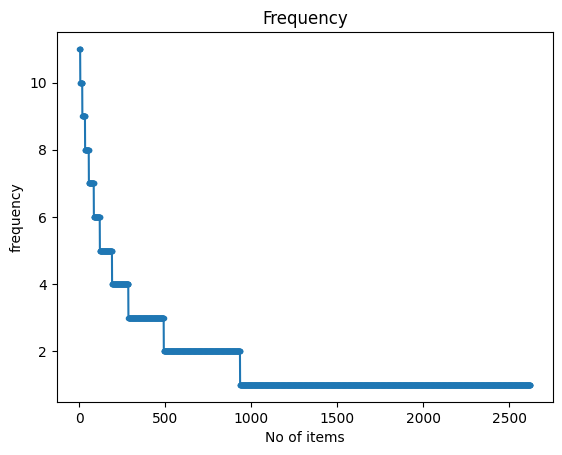

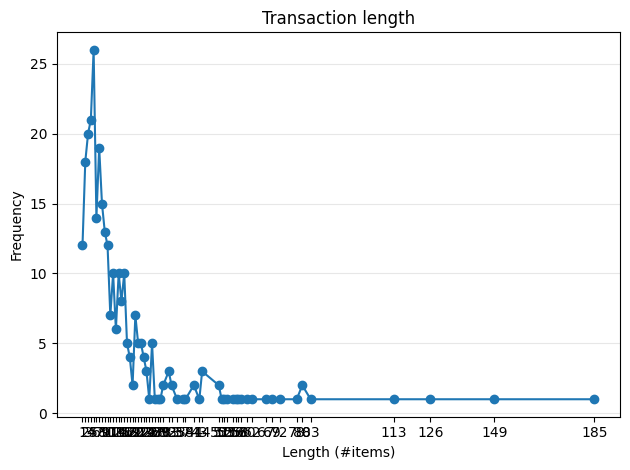

In [60]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 190
Number of items : 1426
Minimum Transaction Size : 1
Average Transaction Size : 12.878947368421052
Maximum Transaction Size : 67
Standard Deviation Transaction Size : 10.779174802288093
Variance in Transaction Sizes : 116.80537454747981
Sparsity : 0.9909684801062966


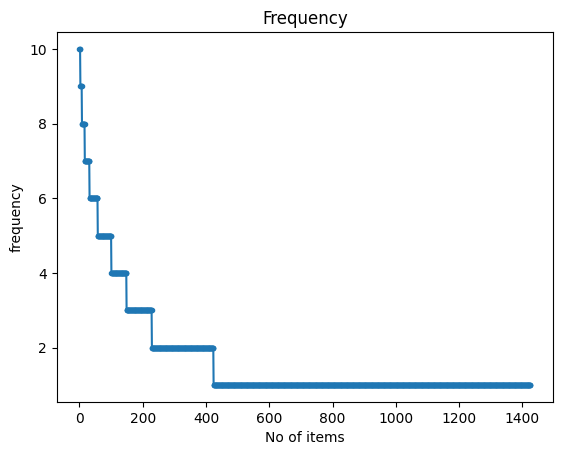

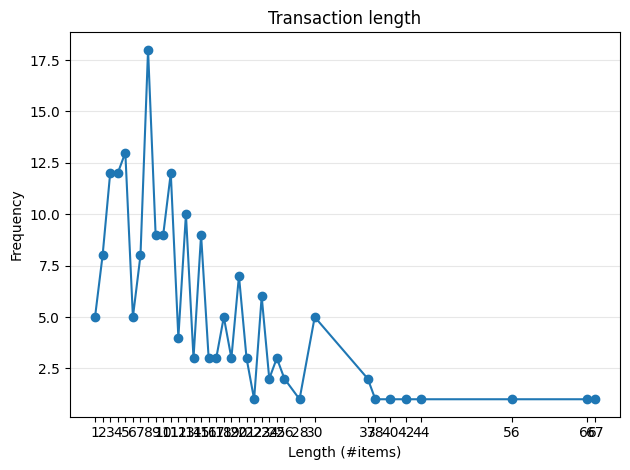

In [61]:
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 289
Number of items : 1028
Minimum Transaction Size : 1
Average Transaction Size : 5.83044982698962
Maximum Transaction Size : 30
Standard Deviation Transaction Size : 4.583214463120476
Variance in Transaction Sizes : 21.078791810841984
Sparsity : 0.9943283561994264


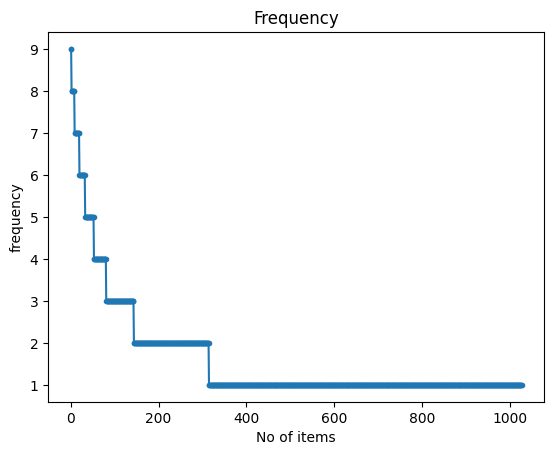

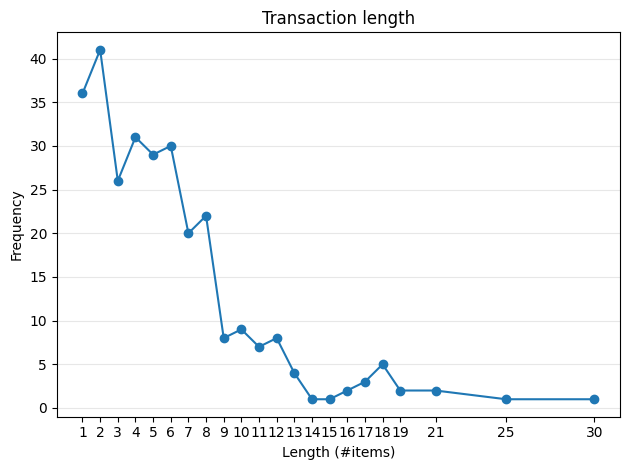

In [62]:
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [63]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 590
Runtime: 0.019138097763061523


In [64]:
obj1.save('freq_patterns_positive_minSup3.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,sec,3
1,base,3
2,handle,3
3,perfectly,3
4,seeing,3
...,...,...
585,let,11
586,most,11
587,most\tlet,3
588,too,11


In [65]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_negative= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 250
Runtime: 0.00535273551940918


In [66]:
obj2.save('freq_patterns_negative_minSup3.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,late,3
1,late\ttoo,3
2,depressing,3
3,trying,3
4,reddit,3
...,...,...
245,retard,9
246,our,9
247,me,10
248,long,10


In [67]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 386
Runtime: 0.005766391754150391


In [68]:
obj2.save('freq_patterns_neutral_minSup2.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,doge,2
1,though,2
2,let,2
3,premarket,2
4,diamond,2
...,...,...
381,who,8
382,more,8
383,tariff,8
384,day,9


### Finding Frequent Patterns -construct TFIDF tabel

In [70]:
import pandas as pd

labels = [frequentPatternsDF_positive, frequentPatternsDF_negative, frequentPatternsDF_neutral]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for label in labels:
    for pattern in label['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

In [71]:
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(label) for label in labels)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for label in labels:
    filtered_df = label[label['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)


final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)


print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

             Patterns  Support
478              long       10
387                go       10
391            thanks       10
477            retard        9
382              many        9
..                ...      ...
630        know\tdont        2
633       money\tmake        2
634       same\tthing        2
635         same\tdid        2
636  thing\tsame\tdid        2

[669 rows x 2 columns]
Number of patterns discarded: 557


In [72]:
df.columns

Index(['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text',
       'subjectivity', 'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [126]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer   
tfidf_vect = TfidfVectorizer()        

df_tdm = tfidf_vect.fit_transform(df['text'])
terms = tfidf_vect.get_feature_names_out()

tdm_df = pd.DataFrame.sparse.from_spmatrix(df_tdm, columns=terms, index=df.index)
tdm_df

,aapl,ability,able,abolish,about,above,absolute,absolutely,abuse,abusing,...,yourselves,youtube,youve,yoyo,yr,yup,zero,zgldsw,zone,zsilsw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df['tokenized_text'] = df['text'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])


for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,aapl,ability,able,abolish,about,above,absolute,absolutely,abuse,abusing,...,come\ttime,isnt\tby,could\ttime,most\tlook,war\tart,know\tdont,money\tmake,same\tthing,same\tdid,thing\tsame\tdid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Finding Frequent Patterns -Visualization

In [128]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
df_pca_augmented = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_augmented = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_augmented = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

In [129]:
# Plot the results in subplots
col = ['blue', 'coral', 'black']
sentiments = df['sentiment'].unique()

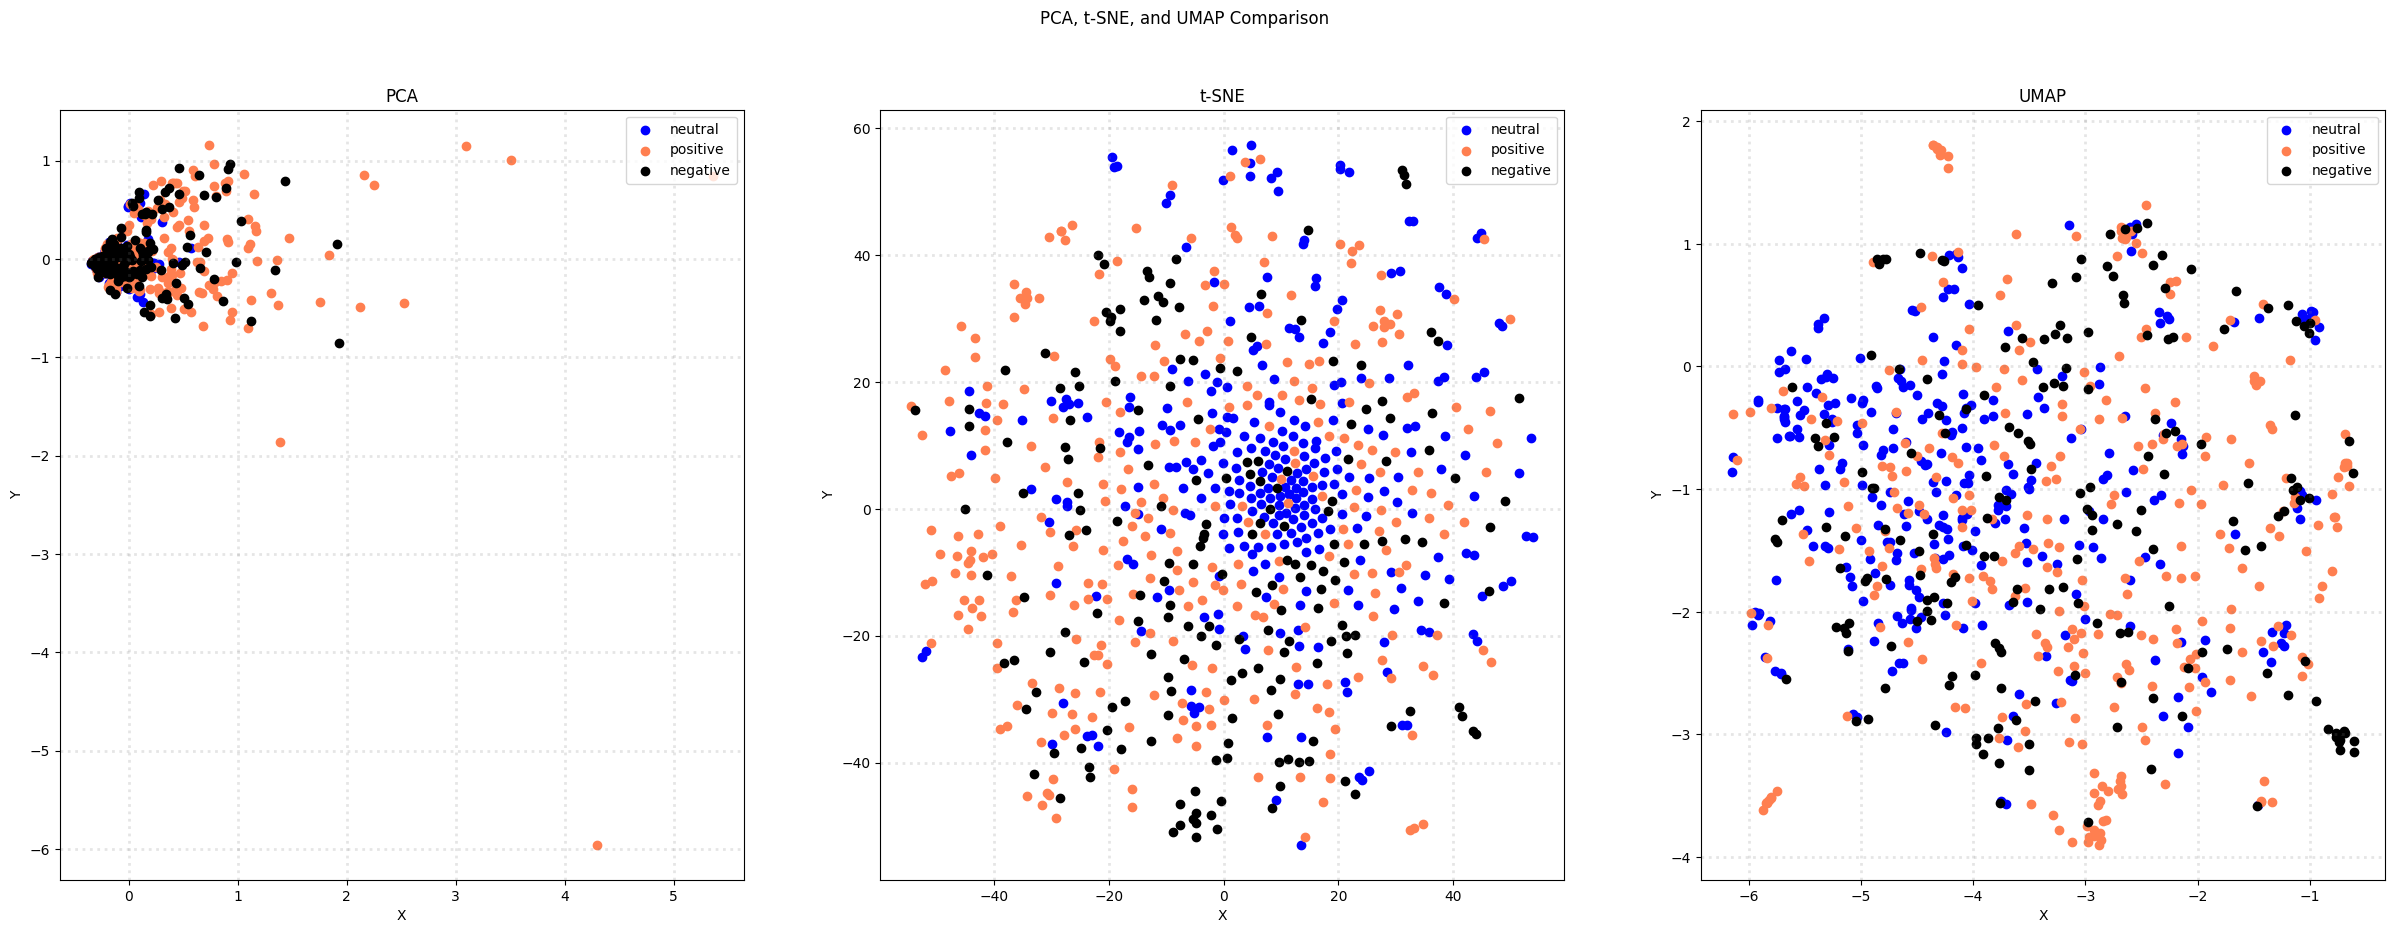

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

label_map = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = df_reduced[df['sentiment'] == sentiment].T[0]
        ys = df_reduced[df['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=label_map[sentiment])
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], df_pca_augmented, 'PCA')
plot_scatter(axes[1], df_tsne_augmented, 't-SNE')
plot_scatter(axes[2], df_umap_augmented, 'UMAP')

plt.show()

### Discretization and Binarization

In [131]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [132]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [133]:
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()

In [134]:
df[0:9]

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,bin_sentiment
0,comment,2021-01-28 17:58:52,stockstobuytoday,r/stockstobuytoday Lounge,1,doge is going up today,0.000000,0.000000,0.0,"['today', '%', 'DOGE']",1.0,"{up, today, going, is, doge}","[0, 1, 0]"
1,comment,2021-01-28 17:59:46,stockstobuytoday,r/stockstobuytoday Lounge,1,i feel like thats gonna tank soon though,0.000000,0.000000,0.0,"['tank', '’']",-1.0,"{like, gonna, soon, thats, feel, i, tank, though}","[0, 1, 0]"
2,comment,2021-01-31 02:02:38,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",1,awesome,1.000000,1.000000,1.0,['awesome'],1.0,{awesome},"[0, 0, 1]"
3,comment,2021-02-01 08:17:04,stockstobuytoday,r/stockstobuytoday Lounge,1,lets see how they perform premarket,0.000000,0.000000,0.0,['pre-market'],0.0,"{perform, see, lets, they, premarket, how}","[0, 1, 0]"
4,comment,2021-02-01 13:56:01,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,i was also disappointed to see it mentioned in...,0.675000,-0.125000,-1.0,"['Morning', 'Brew', 'newsletter']",-1.0,"{newsletter, enjoying, was, until, also, it, s...","[1, 0, 0]"
5,comment,2021-02-01 13:59:43,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",5,too late i bought silver and a shit ton of min...,0.488889,-0.166667,-1.0,"['year', 'ton', 'Silver', 'Too']",0.0,"{and, too, miners, shit, late, silver, bought,...","[1, 0, 0]"
6,comment,2021-02-01 14:11:17,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,i work in finance writing sort of and its insa...,0.590000,-0.340000,-1.0,"['online', 'insane', 'gold', 'writing', 'oil',...",-1.0,"{writing, see, to, or, how, get, snake, really...","[1, 0, 0]"
7,comment,2021-02-01 14:19:34,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,i mean silver is used a lot in electronics and...,0.443750,-0.056250,-1.0,"['silver', 'lot']",1.0,"{mean, and, really, electronics, silver, used,...","[1, 0, 0]"
8,comment,2021-02-01 14:26:09,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",2,lmao what thought i was in wsb for a sec with ...,0.783333,0.291667,1.0,"['fund', 'WSB', 'Silver', 'sec', 'trap', 'hedg...",0.0,"{there, just, thought, excited, for, be, to, h...","[0, 0, 1]"


In [135]:
df.head()

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,bin_sentiment
0,comment,2021-01-28 17:58:52,stockstobuytoday,r/stockstobuytoday Lounge,1,doge is going up today,0.000,0.000,0.0,"['today', '%', 'DOGE']",1.0,"{up, today, going, is, doge}","[0, 1, 0]"
1,comment,2021-01-28 17:59:46,stockstobuytoday,r/stockstobuytoday Lounge,1,i feel like thats gonna tank soon though,0.000,0.000,0.0,"['tank', '’']",-1.0,"{like, gonna, soon, thats, feel, i, tank, though}","[0, 1, 0]"
2,comment,2021-01-31 02:02:38,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",1,awesome,1.000,1.000,1.0,['awesome'],1.0,{awesome},"[0, 0, 1]"
3,comment,2021-02-01 08:17:04,stockstobuytoday,r/stockstobuytoday Lounge,1,lets see how they perform premarket,0.000,0.000,0.0,['pre-market'],0.0,"{perform, see, lets, they, premarket, how}","[0, 1, 0]"
4,comment,2021-02-01 13:56:01,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,i was also disappointed to see it mentioned in...,0.675,-0.125,-1.0,"['Morning', 'Brew', 'newsletter']",-1.0,"{newsletter, enjoying, was, until, also, it, s...","[1, 0, 0]"


### Data Exploration

In [136]:
text_to_transform_1 = []
random_record_1 = df.iloc[0]['text'] #positive
text_to_transform_1.append(random_record_1) 

text_to_transform_2 = []
random_record_2 = df.iloc[4]['text'] #negative
text_to_transform_2.append(random_record_2)

text_to_transform_3 = []
random_record_3 = df.iloc[3]['text'] #neutral
text_to_transform_3.append(random_record_3)

In [137]:
print(text_to_transform_1)
print(text_to_transform_2)
print(text_to_transform_3)

['doge is going up today ']
['i was also disappointed to see it mentioned in the morning brew newsletter which i was enjoying until now']
['lets see how they perform premarket']


In [138]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
text_vector_count_1 = count_vect.transform(text_to_transform_1)
text_vector_count_2 = count_vect.transform(text_to_transform_2)
text_vector_count_3 = count_vect.transform(text_to_transform_3)

print(text_vector_count_1)
print()
print(text_vector_count_2)
print()
print(text_vector_count_3)

  (np.int32(0), np.int32(1035))	1
  (np.int32(0), np.int32(1541))	1
  (np.int32(0), np.int32(1947))	1
  (np.int32(0), np.int32(3700))	1
  (np.int32(0), np.int32(3860))	1

  (np.int32(0), np.int32(129))	1
  (np.int32(0), np.int32(447))	1
  (np.int32(0), np.int32(999))	1
  (np.int32(0), np.int32(1174))	1
  (np.int32(0), np.int32(1828))	1
  (np.int32(0), np.int32(1956))	1
  (np.int32(0), np.int32(2261))	1
  (np.int32(0), np.int32(2336))	1
  (np.int32(0), np.int32(2416))	1
  (np.int32(0), np.int32(2458))	1
  (np.int32(0), np.int32(3182))	1
  (np.int32(0), np.int32(3631))	1
  (np.int32(0), np.int32(3698))	1
  (np.int32(0), np.int32(3856))	1
  (np.int32(0), np.int32(3970))	2
  (np.int32(0), np.int32(4025))	1

  (np.int32(0), np.int32(1750))	1
  (np.int32(0), np.int32(2086))	1
  (np.int32(0), np.int32(2630))	1
  (np.int32(0), np.int32(2753))	1
  (np.int32(0), np.int32(3182))	1
  (np.int32(0), np.int32(3642))	1


In [139]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(text_vector_count_1, text_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(text_vector_count_1, text_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(text_vector_count_2, text_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(text_vector_count_1, text_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(text_vector_count_2, text_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(text_vector_count_3, text_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.093659
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\ring9\AppData\Local\Temp\ipykernel_22924\2154984608.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\ring9\AppData\Local\Temp\ipykernel_22924\2154984608.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\ring9\AppData\Local\Temp\ipykernel_22924\2154984608.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

### Data Classification

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [141]:
label_map = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
target_names = [label_map[label] for label in sorted(label_map.keys())]

# Split the data into training and testing sets (70% train, 30% test)
df_train, df_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [142]:
df_train

,aapl,ability,able,abolish,about,above,absolute,absolutely,abuse,abusing,...,come\ttime,isnt\tby,could\ttime,most\tlook,war\tart,know\tdont,money\tmake,same\tthing,same\tdid,thing\tsame\tdid
536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,0,0,0,0,0.148377,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0.166052,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

C:\Users\ring9\Documents\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ring9\Documents\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Accuracy: 0.6302521008403361

Classification Report:
               precision    recall  f1-score   support

    negative     0.6552    0.3455    0.4524        55
     neutral     0.8030    0.5761    0.6709        92
    positive     0.5455    0.8571    0.6667        91

    accuracy                         0.6303       238
   macro avg     0.6679    0.5929    0.5966       238
weighted avg     0.6704    0.6303    0.6188       238



In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
df_train, df_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(df_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(df_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5252100840336135

Classification Report:
               precision    recall  f1-score   support

    negative     0.3333    0.2545    0.2887        55
     neutral     0.5926    0.6957    0.6400        92
    positive     0.5341    0.5165    0.5251        91

    accuracy                         0.5252       238
   macro avg     0.4867    0.4889    0.4846       238
weighted avg     0.5103    0.5252    0.5149       238



In [147]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
df_train, df_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)
# Train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)    
lr_classifier.fit(df_train, y_train)

# Predict and evaluate
y_pred = lr_classifier.predict(df_test)
print("Logistic regression Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Logistic regression Accuracy : 0.592436974789916

Classification Report:
               precision    recall  f1-score   support

    negative     0.6667    0.1091    0.1875        55
     neutral     0.6228    0.7717    0.6893        92
    positive     0.5565    0.7033    0.6214        91

    accuracy                         0.5924       238
   macro avg     0.6153    0.5280    0.4994       238
weighted avg     0.6076    0.5924    0.5474       238



In [148]:
from sklearn.svm import LinearSVC  
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
df_train, df_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)
# Train the Linear SVM classifier
svm_classifier = LinearSVC()
svm_classifier.fit(df_train, y_train)

# Predict and evaluate
y_pred = svm_classifier.predict(df_test)
print("Linear SVM Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Linear SVM Accuracy : 0.634453781512605

Classification Report:
               precision    recall  f1-score   support

    negative     0.6000    0.3273    0.4235        55
     neutral     0.6542    0.7609    0.7035        92
    positive     0.6238    0.6923    0.6562        91

    accuracy                         0.6345       238
   macro avg     0.6260    0.5935    0.5944       238
weighted avg     0.6300    0.6345    0.6207       238

